In [2]:
from __future__ import division
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.convolution import Gaussian1DKernel, convolve

(325, 2112)

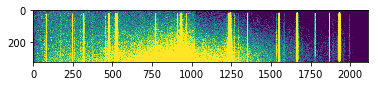

In [3]:
arcs = fits.getdata('arcs.fits')
plt.imshow(arcs,vmin = np.percentile(arcs,16),vmax = np.percentile(arcs,84))
arcs.shape

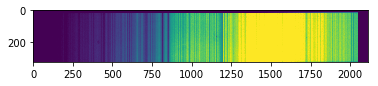

In [4]:
solar = fits.getdata('solar_spectrum.fits')
plt.imshow(solar,vmin = np.percentile(solar,16),vmax = np.percentile(solar,84))

### Find calibration function

(2112,)


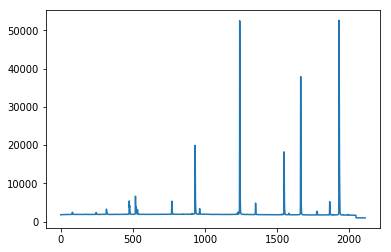

In [5]:
arc_1D = np.median(arcs,axis = 0)
print(arc_1D.shape)
plt.plot(arc_1D)
arc_1D_list = list(arc_1D)

calibration parameteres 1.016696563889786 3108.5331864145674


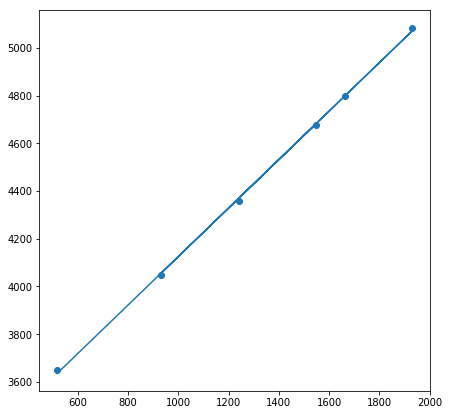

In [35]:
x = np.array([1241,1930,1664,932,1549,518])
y = np.array([4358, 5085,4799,4046,4678,3650])

plt.figure(figsize=(7,7))
plt.scatter(x,y)

m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1)) #weight with uncertainties
print('calibration parameteres',m_fit, b_fit)

y_fit = m_fit *x + b_fit
plt.plot(x,y_fit,label='fit')

### Solar Spectrum

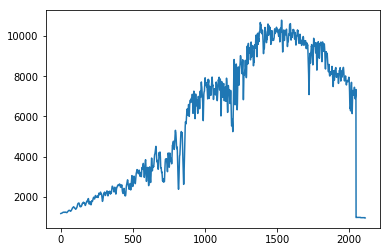

In [7]:
solar_1D = np.median(solar,axis=0)
plt.plot(solar_1D)

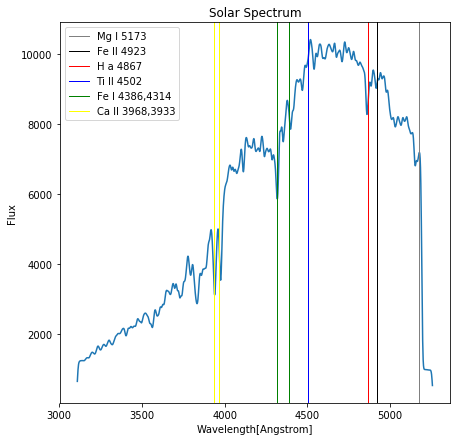

In [36]:
#smooth the spectrum via Guassian blurr
gauss_kernel = Gaussian1DKernel(5)
smoothed_solar = convolve(solar_1D, gauss_kernel)
#apply the parameteres caculated above
x = np.linspace(1,2112,2112)*m_fit + b_fit

#plot the corrected spectrum and absorbation/emission lines
plt.figure(figsize=(7,7))
plt.plot(x,smoothed_solar)

plt.axvline(x=5173,color='grey',label="Mg I 5173",linewidth = "1")
plt.axvline(x=4923,color='black',label="Fe II 4923",linewidth = "1")
plt.axvline(x=4867,color='r',label="H a 4867",linewidth = "1")
plt.axvline(x=4502,color='blue',label="Ti II 4502",linewidth = "1")
plt.axvline(x=4386,color='green',label="Fe I 4386,4314",linewidth = "1")
plt.axvline(x=4314,color='green',linewidth = "1")
plt.axvline(x=3968,color='yellow',label="Ca II 3968,3933",linewidth = "1")
plt.axvline(x=3933,color='yellow',linewidth = "1")

plt.xlabel('Wavelength[Angstrom]')
plt.ylabel('Flux')
plt.title('Solar Spectrum')
plt.legend()
plt.savefig("Pengpei_exerciseA.png")

### Exerceise B

(2112,)


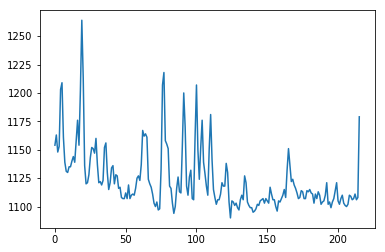

In [39]:
import astroscrappy

#plot the wavelegth profile
sci = fits.getdata('sci_test.fits')
sci_1D= np.median(sci,axis = 0)
plt.plot(sci_1D)

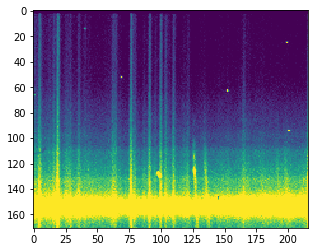

In [103]:
plt.imshow(sci,vmin = np.percentile(sci,16),vmax = np.percentile(sci,90))

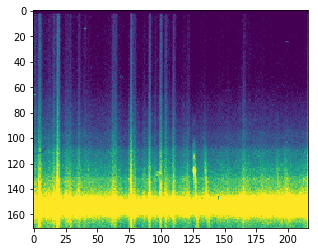

In [42]:
#remove the cosmic rays
_,sciCR = astroscrappy.detect_cosmics(sci,inmask=None, cleantype = 'meanmask')
plt.imshow(sciCR,vmin = np.percentile(sciCR,16),vmax = np.percentile(sciCR,90))

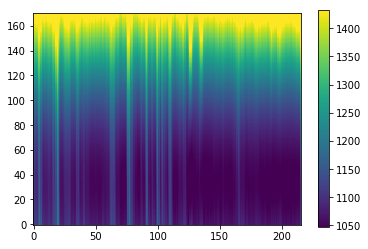

In [56]:
#extract and substract the backgroud
xrows = np.arange(sciCR.shape[0])
bkg = np.zeros_like(sciCR)
x = np.arange(10,140)
for col in np.arange(sciCR.shape[1]):
    pfit = np.polyfit(x, sciCR[x, col], 2)
    bkg[:, col] = np.polyval(pfit,xrows)
    
plt.clf()
plt.imshow(bkg, origin='lower', vmin=np.percentile(bkg,5), vmax=np.percentile(bkg,95))
plt.colorbar()

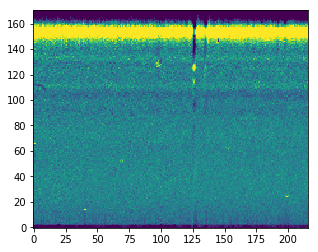

In [57]:
a = sciCR - bkg

plt.imshow(a, vmin= np.percentile(a, 5), vmax =np.percentile(a, 95), origin='lower')

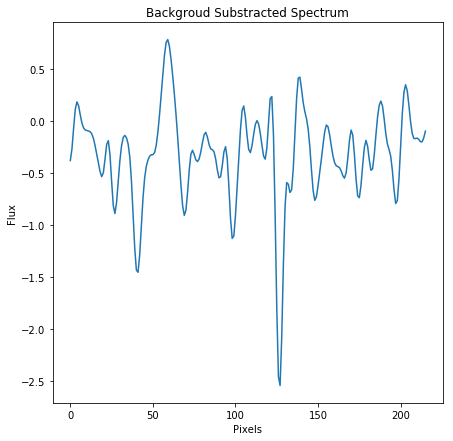

In [61]:
plt.figure(figsize=(7,7))

gauss_kernel = Gaussian1DKernel(2)

redsci_1D= np.median(a,axis = 0)
smoothed_sci = convolve(redsci_1D, gauss_kernel)

plt.plot(smoothed_sci)
plt.xlabel('Pixels')
plt.ylabel('Flux')
plt.title('Backgroud Substracted Spectrum')
plt.savefig('backgroud_sub.png')

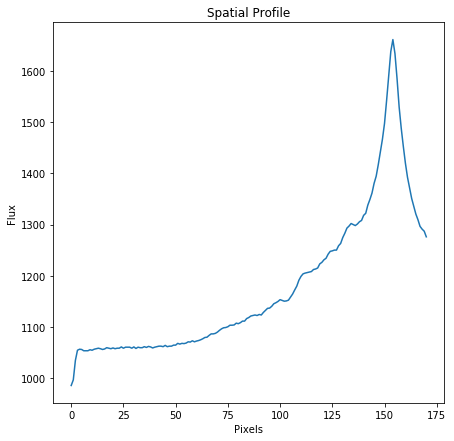

In [38]:
sci_1D_spical= np.median(sci,axis = 1)
plt.figure(figsize=(7,7))
plt.plot(sci_1D_spical)
plt.xlabel('Pixels')
plt.ylabel('Flux')
plt.title('Spatial Profile')
plt.savefig('spatial profile.png')